 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [20]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [21]:
# Reading whale returns
whale_returns_path = Path("./Resources/whale_returns.csv")
whale_portfolio = pd.read_csv(
                whale_returns_path, 
                parse_dates=True, 
                infer_datetime_format=True)
whale_portfolio.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [22]:
# Count nulls
whale_portfolio.isna().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [23]:
# Drop nulls
whale_portfolio = whale_portfolio.dropna()
whale_portfolio.isna().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [24]:
# Reading algorithmic returns
algo_returns_path = Path("./Resources/algo_returns.csv")
algo_portfolio = pd.read_csv(
                algo_returns_path, 
                parse_dates=True, 
                infer_datetime_format=True)
algo_portfolio.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [25]:
# Count nulls 
algo_portfolio.isna().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [26]:
algo_portfolio.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [27]:
# Drop nulls
algo_portfolio = algo_portfolio.dropna()
algo_portfolio.isna().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [28]:
algo_portfolio.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [88]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("./Resources/sp500_history.csv")
sp500_portfolio = pd.read_csv(
                sp500_history_path,
                parse_dates=True, 
                infer_datetime_format=True).sort_index(ascending=False)
sp500_portfolio["Close"] = sp500_portfolio["Close"].str.replace("$", " ")
sp500_portfolio.head()

,Date,Close
1648,1-Oct-12,1444.49
1647,2-Oct-12,1445.75
1646,3-Oct-12,1450.99
1645,4-Oct-12,1461.40
1644,5-Oct-12,1460.93


In [89]:
# Check Data Types
sp500_portfolio.dtypes

Date     object
Close    object
dtype: object

In [90]:
# Fix Data Types 
sp500_portfolio["Close"] = sp500_portfolio["Close"].astype("float") 
sp500_portfolio.dtypes

Date      object
Close    float64
dtype: object

In [91]:
sp500_portfolio.head()

,Date,Close
1648,1-Oct-12,1444.49
1647,2-Oct-12,1445.75
1646,3-Oct-12,1450.99
1645,4-Oct-12,1461.40
1644,5-Oct-12,1460.93


In [92]:
# Calculate Daily Returns
sp500_portfolio = sp500_portfolio.Close.pct_change()
sp500_portfolio.head()

1648         NaN
1647    0.000872
1646    0.003624
1645    0.007174
1644   -0.000322
Name: Close, dtype: float64

In [93]:
# Drop nulls
sp500_portfolio = sp500_portfolio.dropna()
sp500_portfolio.isna().sum()

0

In [96]:
# Rename `Close` Column to be specific to this portfolio.
sp500_portfolio = sp500_portfolio.rename(columns = {"Close": "S&P 500"})
sp500_portfolio.head()

TypeError: rename() got an unexpected keyword argument 'columns'

## Combine Whale, Algorithmic, and S&P 500 Returns

In [98]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolio = pd.concat([whale_portfolio, algo_portfolio, sp500_portfolio], axis="columns", join="inner")
combined_portfolio.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,Close
6,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,2014-06-05,0.004062,0.013285,0.006609
7,2015-03-11,0.004012,0.005163,0.003312,-0.001147,2014-06-06,0.001857,0.008284,0.000038
8,2015-03-12,0.008265,0.010272,0.013117,0.010801,2014-06-09,-0.005012,0.005668,0.003478
9,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,2014-06-10,0.004406,-0.000735,-0.006067
10,2015-03-16,0.007901,0.003583,0.007953,0.008055,2014-06-11,0.004760,-0.003761,0.001047


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

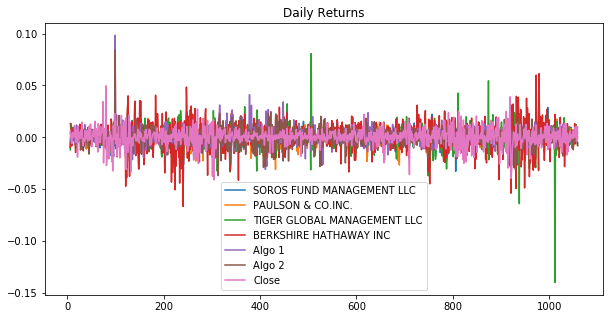

In [105]:
# Plot daily returns of all portfolios
combined_portfolio.plot(figsize=(10,5), title="Daily Returns")

#### Calculate and Plot cumulative returns.

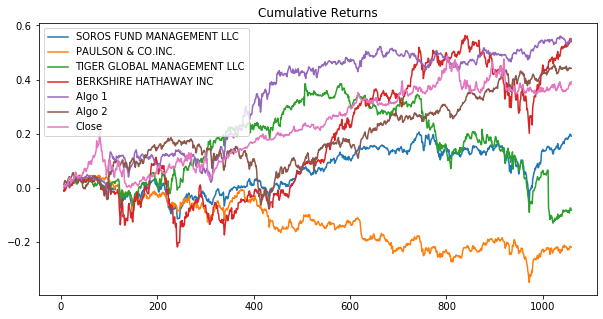

In [109]:
# Calculate cumulative returns of all portfolios
cumulative_returns = combined_portfolio.cumsum()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


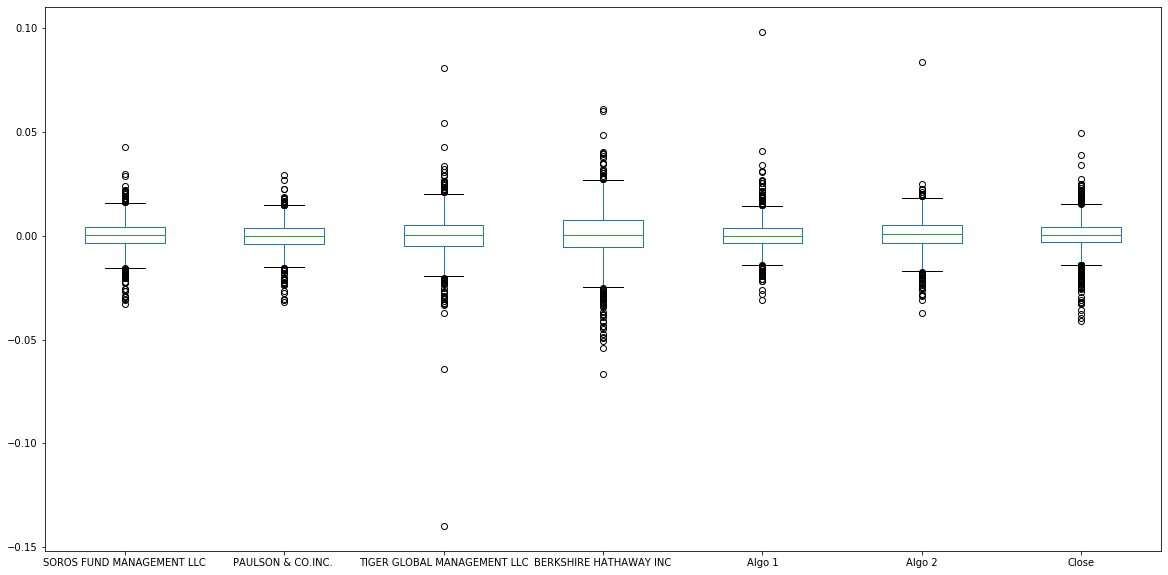

In [114]:
# Box plot to visually show risk
combined_portfolio.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [115]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_portfolio.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007855
PAULSON & CO.INC.              0.006988
TIGER GLOBAL MANAGEMENT LLC    0.010845
BERKSHIRE HATHAWAY INC         0.012850
Algo 1                         0.007745
Algo 2                         0.008265
Close                          0.008529
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [120]:
# Calculate  the daily standard deviation of S&P 500
daily_std_sp500 = daily_std["S&P 500"].std()
# Determine which portfolios are riskier than the S&P 500
risky_portfolio = daily_std > daily_std_sp500
risky_portfolio.head()

SOROS FUND MANAGEMENT LLC      True
PAULSON & CO.INC.              True
TIGER GLOBAL MANAGEMENT LLC    True
BERKSHIRE HATHAWAY INC         True
Algo 1                         True
dtype: bool

### Calculate the Annualized Standard Deviation

In [122]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std*np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124700
PAULSON & CO.INC.              0.110926
TIGER GLOBAL MANAGEMENT LLC    0.172156
BERKSHIRE HATHAWAY INC         0.203994
Algo 1                         0.122946
Algo 2                         0.131206
Close                          0.135386
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

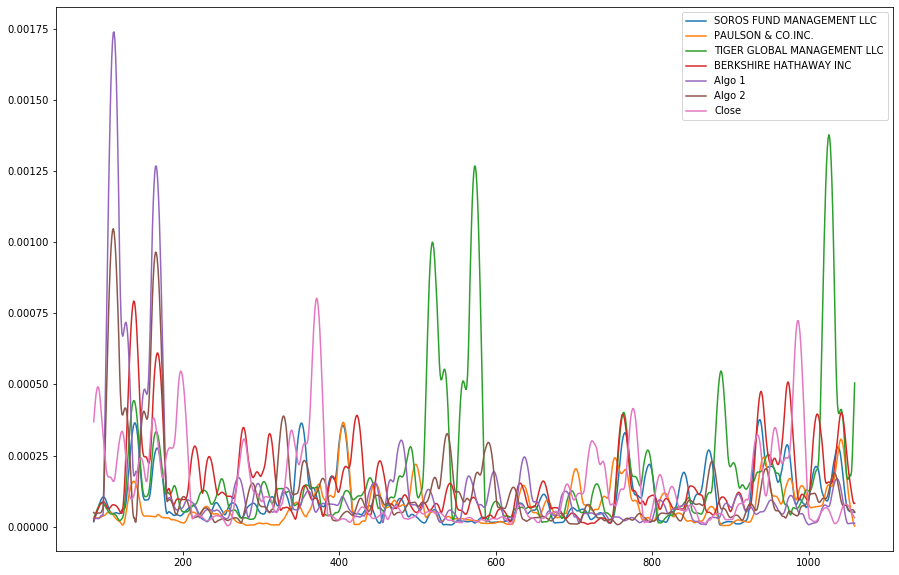

In [127]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_portfolio = combined_portfolio.rolling(window=21).std()
# Plot the rolling standard deviation
combined_portfolio.plot(figsize=(15,10))

### Calculate and plot the correlation

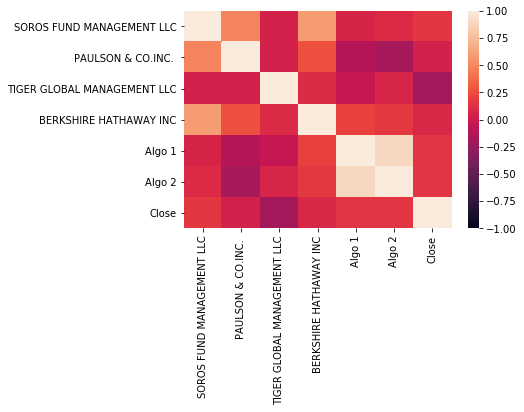

In [129]:
import seaborn as sns
# Calculate the correlation
correlation = combined_portfolio.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

# Calculate and Plot Beta for a chosen portfolio and the S&P 500


In [137]:
# Calculate covariance of a single portfolio
covariance = whale_portfolio["PAULSON & CO.INC. "].cov(combined_portfolio["Close"])
# Calculate variance of S&P 500
variance = combined_portfolio['Close'].var()
# Computing beta
portfolio_beta = covariance / variance
# Plot beta trend
portfolio_beta

1.2222361521349567

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window
rolling_ewm

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [151]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_portfolio.mean()*252) / (combined_portfolio.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      17.971251
PAULSON & CO.INC.              17.528640
TIGER GLOBAL MANAGEMENT LLC    12.845568
BERKSHIRE HATHAWAY INC         18.378794
Algo 1                          8.835804
Algo 2                         11.882282
Close                          14.688883
dtype: float64

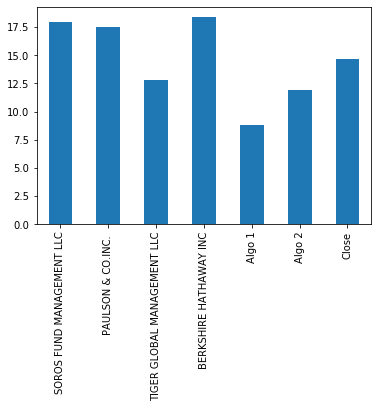

In [152]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [153]:
# Reading data from 1st stock
goog_data = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_data, parse_dates=True, infer_datetime_format=True)

In [154]:
# Reading data from 2nd stock
aapl_data = Path("./Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_data, parse_dates=True, infer_datetime_format=True)

In [155]:
# Reading data from 3rd stock
cost_data = Path("./Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_data, parse_dates=True, infer_datetime_format=True) 

In [156]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([goog_df, aapl_df, cost_df])
combined_stocks_df.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [157]:
# Reset Date index
combined_stocks_df = combined_stocks_df.reset_index()

In [158]:
# Reorganize portfolio data by having a column per symbol
combined_stocks_df = combined_stocks_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
combined_stocks_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
1/10/2019,153.80,210.64,1070.33
1/11/2019,152.29,210.51,1057.19
1/14/2019,150.00,209.00,1044.69
1/15/2019,153.07,211.03,1077.15
1/16/2019,154.94,210.18,1080.97


In [159]:
# Calculate daily returns
# Drop NAs
# Display sample data
daily_returns_combined = combined_stocks_df.pct_change().dropna()
daily_returns_combined.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
1/11/2019,-0.009818,-0.000617,-0.012277
1/14/2019,-0.015037,-0.007173,-0.011824
1/15/2019,0.020467,0.009713,0.031071
1/16/2019,0.012217,-0.004028,0.003546
1/17/2019,0.005938,0.006090,0.008261


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [160]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
portfolio_returns = combined_stocks_df.dot(weights)
# Display sample data
portfolio_returns.head()

Trade DATE
1/10/2019    478.256667
1/11/2019    473.330000
1/14/2019    467.896667
1/15/2019    480.416667
1/16/2019    482.030000
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [161]:
# Join your returns DataFrame to the original returns DataFrame
all_returns_df = pd.concat([portfolio_returns, combined_stocks_df], axis="columns", join="inner")
all_returns_df.head()

,0,AAPL,COST,GOOG
Trade DATE,,,,
1/10/2019,478.256667,153.80,210.64,1070.33
1/11/2019,473.330000,152.29,210.51,1057.19
1/14/2019,467.896667,150.00,209.00,1044.69
1/15/2019,480.416667,153.07,211.03,1077.15
1/16/2019,482.030000,154.94,210.18,1080.97


In [162]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns_df.dropna()

,0,AAPL,COST,GOOG
Trade DATE,,,,
1/10/2019,478.256667,153.80,210.64,1070.33
1/11/2019,473.330000,152.29,210.51,1057.19
1/14/2019,467.896667,150.00,209.00,1044.69
1/15/2019,480.416667,153.07,211.03,1077.15
1/16/2019,482.030000,154.94,210.18,1080.97
...,...,...,...,...
9/28/2018,551.363333,225.74,234.88,1193.47
9/4/2018,553.346667,228.36,234.68,1197.00
9/5/2018,549.653333,226.87,235.61,1186.48


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [163]:
# Calculate the annualized `std`
all_returns_df.std()

0       30.252708
AAPL    21.436472
COST    14.434399
GOOG    67.846776
dtype: float64

### Calculate and plot rolling `std` with 21-day window

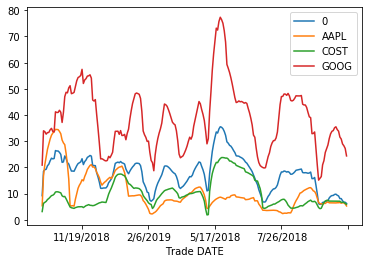

In [165]:
# Calculate rolling standard deviation
all_returns_roll = all_returns_df.rolling(window=21).std()
# Plot rolling standard deviation
all_returns_roll.plot()

### Calculate and plot the correlation

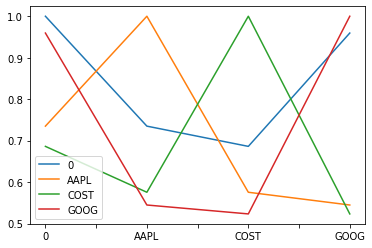

In [166]:
# Calculate and plot the correlation
all_returns_corr = all_returns_df.corr()
all_returns_corr.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta
covariance = daily_returns['my_port'].cov(daily_returns['SP500'])
variance = 
my_port_beta = covariance / variance
.rolling(window=60)
my_port_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios
# annualized_sharpe_ratio = (returns_portfolio - risk_free_rate)/std

In [ ]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio.plot.bar()

### How does your portfolio do?

Write your answer here!